# Predicting Future Energy Consumption

Regression + visualization

# 1- Importing Key Modules

In [24]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pprint
%matplotlib inline

In [26]:
# for deep learning
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

# 2- Loading and preparing Data


- https://www.kaggle.com/robikscube/hourly-energy-consumption
- Hourly Energy Consumption
- Over 10 years of hourly energy consumption data from PJM in Megawatts

In [27]:
df = pd.read_csv("AEP_hourly.csv")
df.shape

(121273, 2)

In [28]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [29]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
Datetime    121273 non-null object
AEP_MW      121273 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


- Datatime is not object. We need to convert it in correct format.
- We can also see there are no missing values

In [31]:
# double check
df.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [32]:
df["New_Date"] = pd.to_datetime(df["Datetime"]).dt.date
df["New_Time"] = pd.to_datetime(df["Datetime"]).dt.time

In [33]:
df.head()

,Datetime,AEP_MW,New_Date,New_Time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00


##### When was the higest Energy Consumption and which Year

In [34]:
df1 = df
df1[df1["AEP_MW"] == df["AEP_MW"].max()]

,Datetime,AEP_MW,New_Date,New_Time
30221,2008-10-20 14:00:00,25695.0,2008-10-20,14:00:00


##### When was the lowest Energy Consumption and which Year

In [35]:
df1[df1["AEP_MW"] == df["AEP_MW"].min()]

,Datetime,AEP_MW,New_Date,New_Time
100759,2016-10-02 05:00:00,9581.0,2016-10-02,05:00:00


# 3-Visulization

### 3.1.Energy Distribution

Text(0.5, 1.0, 'Ennergy Distribution')

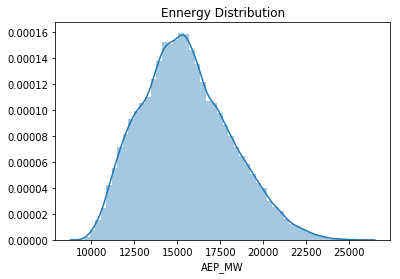

In [36]:
sns.distplot(df1["AEP_MW"])
plt.title("Ennergy Distribution")

In [37]:
df1["Year"] = pd.DatetimeIndex(df['New_Date']).year
df1["Year"].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018], dtype=int64)

In [38]:
df1[df1["Year"] == 2013].nunique()

Datetime    8758
AEP_MW      5601
New_Date     365
New_Time      24
Year           1
dtype: int64

### 3.2.Relationship of Energy vs Year

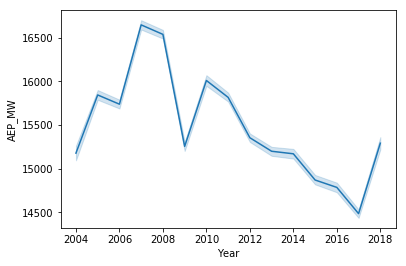

In [39]:
sns.lineplot(x=df1["Year"],y=df1["AEP_MW"], data=df1)

### 3.3.Relationship of Energy vs Time

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 5 columns):
Datetime    121273 non-null object
AEP_MW      121273 non-null float64
New_Date    121273 non-null object
New_Time    121273 non-null object
Year        121273 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.6+ MB


In [41]:
df["New_Time"]= df1["New_Time"].astype(str)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 5 columns):
Datetime    121273 non-null object
AEP_MW      121273 non-null float64
New_Date    121273 non-null object
New_Time    121273 non-null object
Year        121273 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.6+ MB


No handles with labels found to put in legend.


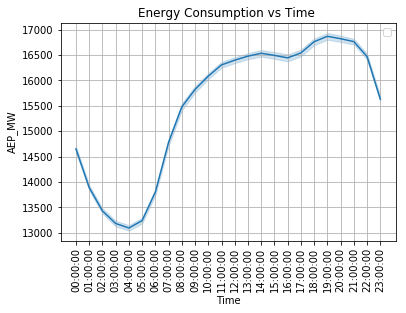

In [43]:
from matplotlib import style
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=df1["New_Time"],y=df1["AEP_MW"], data=df1)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# 4-Regression

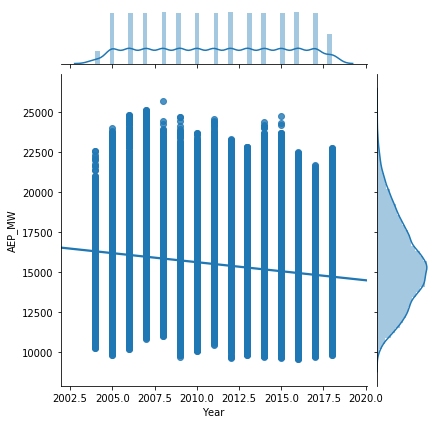

In [44]:
sns.jointplot(x=df1["Year"],
              y=df1["AEP_MW"],
              data=df1,
             kind="reg")

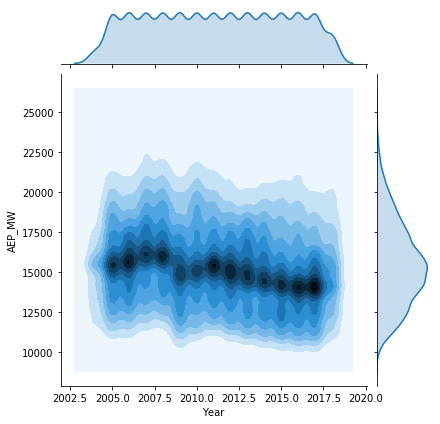

In [45]:
sns.jointplot(x=df1["Year"],
              y=df1["AEP_MW"],
              data=df1,
             kind="kde")